In [1]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis, iqr, f_oneway
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import f_oneway, tukey_hsd

In [2]:
# Load the dataset
df = pd.read_csv('./datasert.csv')


In [3]:
# Handle NaNs and normalize the data
df.fillna(method='ffill', inplace=True)
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


/var/folders/2d/fcgrngd95_b823fdj1fwwj840000gn/T/ipykernel_75657/2152748432.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [4]:
# Extract statistical features
def extract_features(df):
    features = {}
    for col in df.columns:
        features[f'{col}_mean'] = np.mean(df[col])
        features[f'{col}_median'] = np.median(df[col])
        features[f'{col}_std'] = np.std(df[col])
        features[f'{col}_var'] = np.var(df[col])
        features[f'{col}_iqr'] = iqr(df[col])
        features[f'{col}_range'] = np.max(df[col]) - np.min(df[col])
        features[f'{col}_skew'] = skew(df[col])
        features[f'{col}_kurtosis'] = kurtosis(df[col])
        features[f'{col}_max'] = np.max(df[col])
        features[f'{col}_min'] = np.min(df[col])
        features[f'{col}_energy'] = np.sum(np.square(df[col]))
    return pd.DataFrame([features])


In [5]:
# Apply feature extraction
feature_df = extract_features(data_scaled)
print(f"Extracted {len(feature_df.columns)} features.")

Extracted 396 features.


In [6]:
print(feature_df.columns)

Index(['Ax_RS_mean', 'Ax_RS_median', 'Ax_RS_std', 'Ax_RS_var', 'Ax_RS_iqr',
       'Ax_RS_range', 'Ax_RS_skew', 'Ax_RS_kurtosis', 'Ax_RS_max', 'Ax_RS_min',
       ...
       'Gz_LS_median', 'Gz_LS_std', 'Gz_LS_var', 'Gz_LS_iqr', 'Gz_LS_range',
       'Gz_LS_skew', 'Gz_LS_kurtosis', 'Gz_LS_max', 'Gz_LS_min',
       'Gz_LS_energy'],
      dtype='object', length=396)


In [ ]:
# Extract selected statistical features
def extract_features_paper(df):
    features = {}
    features['Mean_Gyr'] = np.mean(np.sqrt(df['Gx_RS']**2 + df['Gy_RS']**2 + df['Gz_RS']**2))
    features['Max_Acc'] = np.max(np.sqrt(df['Ax_RS']**2 + df['Ay_RS']**2 + df['Az_RS']**2))
    features['IQR_GyrX'] = iqr(df['Gx_RS'])
    features['Min_Acc'] = np.min(np.sqrt(df['Ax_RS']**2 + df['Ay_RS']**2 + df['Az_RS']**2))
    features['Mean_AccX'] = np.mean(df['Ax_RS'])
    features['Mean_AccY'] = np.mean(df['Ay_RS'])
    features['Mean_AccZ'] = np.mean(df['Az_RS'])
    features['Var_Gyr'] = np.var(np.sqrt(df['Gx_RS']**2 + df['Gy_RS']**2 + df['Gz_RS']**2))
    features['IQR_AccX'] = iqr(df['Ax_RS'])
    features['IQR_AccY'] = iqr(df['Ay_RS'])
    features['IQR_AccZ'] = iqr(df['Az_RS'])
    features['Std_Gyr'] = np.std(np.sqrt(df['Gx_RS']**2 + df['Gy_RS']**2 + df['Gz_RS']**2))
    features['Skew_Acc'] = skew(np.sqrt(df['Ax_RS']**2 + df['Ay_RS']**2 + df['Az_RS']**2))
    features['Kurt_Gyr'] = kurtosis(np.sqrt(df['Gx_RS']**2 + df['Gy_RS']**2 + df['Gz_RS']**2))
    
    return pd.DataFrame([features])

# Apply feature extraction
feature_df_paper = extract_features_paper(data_scaled)
print(f"Extracted {len(feature_df_paper.columns)} features.")


Extracted 14 features.


In [8]:
import matplotlib.pyplot as plt


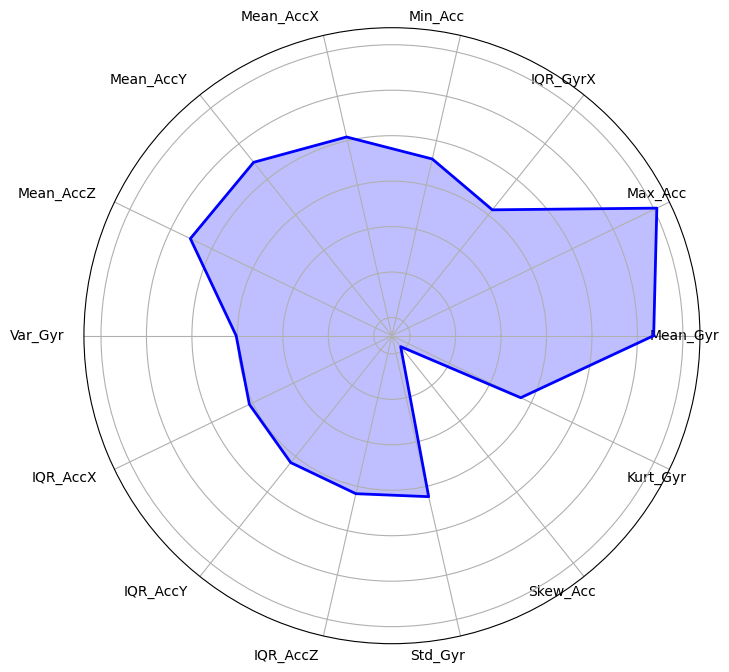

In [11]:
# Prepare for radar plot
labels = list(feature_df_paper.columns)
values = feature_df_paper.iloc[0].values

# Radar plot function
def plot_radar(labels, values):
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    values = np.concatenate((values, [values[0]]))  # Close the circle
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='b', alpha=0.25)
    ax.plot(angles, values, color='b', linewidth=2)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10, rotation=45, ha='right')

    # plt.title("Gait Feature Radar Plot", fontsize=11)
    plt.show()

# Generate the radar plot
plot_radar(labels, values)